In [1]:
import spinesTS
spinesTS.__version__

'0.4.10'

In [2]:
from spinesTS.preprocessing import split_series
from spinesTS.plotting import plot2d
from sklearn.metrics import r2_score

In [3]:
from spinesTS.data import BuiltInSeriesData
from spinesTS.nn import *
from spinesTS.metrics import mean_absolute_error
from spinesTS.metrics import mean_absolute_percentage_error

In [4]:
series_data = BuiltInSeriesData()

+----+----------------------+----------------------------------------------+
|    | ds name              | columns                                      |
+----+----------------------+----------------------------------------------+
|  0 | AirPassengers        | Month, Passengers                            |
|  1 | ETTh1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT |
|  2 | ETTh2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT |
|  3 | ETTm1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT |
|  4 | ETTm2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT |
|  5 | Electric_Production  | date, value                                  |
|  6 | Messages_Sent        | date, ta, tb, tc                             |
|  7 | Messages_Sent_Hour   | date, ta, tb, tc                             |
|  8 | Supermarket_Incoming | date, goods_cnt                              |
|  9 | Web_Sales            | date, type_a, type_b, sales_cnt              |

In [5]:
cs = series_data['ETTh1']

x_train, x_test, y_train, y_test = split_series(cs['OT'], cs['OT'], 128, 30, train_size=0.9)

In [6]:
x_train.shape, x_test.shape

((15536, 128), (1727, 128))

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

scaler2 = MinMaxScaler()
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.transform(y_test)

# TCN

[log] INFO - Information about the device used for computation:
MPS  available: True   | MPS  use: True
CUDA available: False  | CUDA use: False
TPU  available: False  | TPU  use: False
CPU  available: True   | CPU  use: False


Epoch 1/3000  
4/4 - p0 -  [*lr: 0.0009045] - loss: 0.2210 - mae: 0.2210 - val_loss: 0.1008 - val_mae: 0.1008 - 0.59s/epoch - 0.146s/step
Epoch 2/3000  
4/4 - p0 -  [*lr: 0.0006545] - loss: 0.1282 - mae: 0.1282 - val_loss: 0.0661 - val_mae: 0.0661 - 0.20s/epoch - 0.050s/step
Epoch 3/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.0955 - mae: 0.0955 - val_loss: 0.0606 - val_mae: 0.0606 - 0.13s/epoch - 0.032s/step
Epoch 4/3000  
4/4 - p0 -  [*lr: 9.55e-05] - loss: 0.0910 - mae: 0.0910 - val_loss: 0.0557 - val_mae: 0.0557 - 0.20s/epoch - 0.049s/step
Epoch 5/3000  
4/4 - p0 - [*lr: 0.000000e+00] - loss: 0.0870 - mae: 0.0870 - val_loss: 0.0535 - val_mae: 0.0535 - 0.13s/epoch - 0.034s/step
Epoch 6/3000  
4/4 - p1 -  [*lr: 9.55e-05] - loss: 0.0856 - mae: 0.0856 - val_loss: 0.0535 - val_mae: 0.0535 - 0.20s/epoch - 0.049s/step
Epoch 7/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.0844 - mae: 0.0844 - val_loss: 0.0504 - val_mae: 0.0504 - 0.13s/epoch - 0.032s/step
Epoch 8/3000  
4/4 - p0 -  [*lr: 0

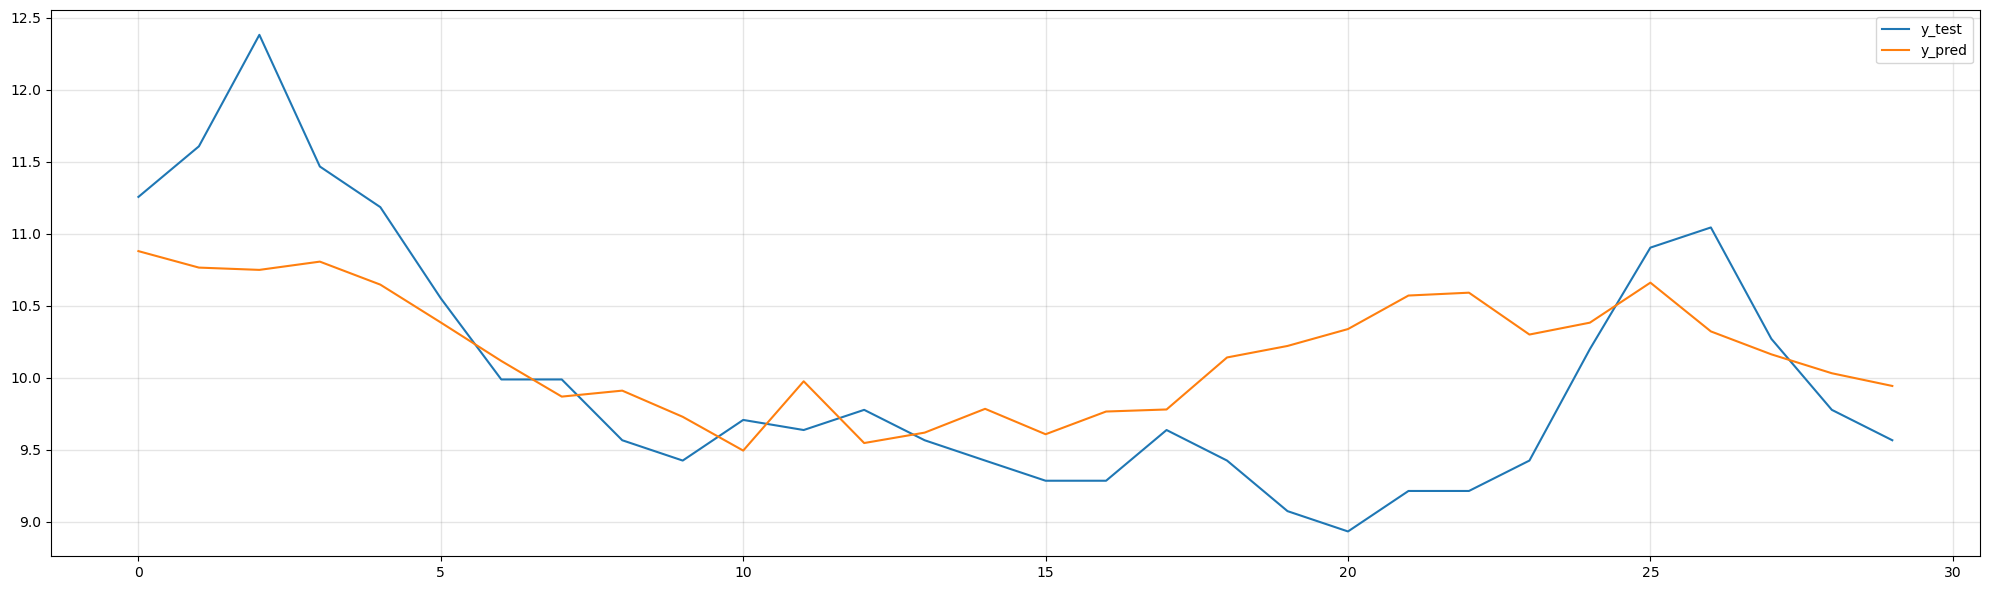

In [8]:
from spinesTS.nn._tcn import TCN

model = TCN(128, 30, random_seed=42, loss_fn='mae', learning_rate=0.001, device='auto')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size='auto', min_delta=0, patience=100, epochs=3000, verbose=True)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))

y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# SegRNN

MPS  available: True   | MPS  use: True
CUDA available: False  | CUDA use: False
TPU  available: False  | TPU  use: False
CPU  available: True   | CPU  use: False


Epoch 1/3000  
4/4 - p0 -  [*lr: 0.0009045] - loss: 0.4835 - mae: 0.4835 - val_loss: 0.2594 - val_mae: 0.2594 - 0.92s/epoch - 0.231s/step
Epoch 2/3000  
4/4 - p0 -  [*lr: 0.0006545] - loss: 0.2982 - mae: 0.2982 - val_loss: 0.2342 - val_mae: 0.2342 - 0.36s/epoch - 0.091s/step
Epoch 3/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.1547 - mae: 0.1547 - val_loss: 0.2112 - val_mae: 0.2112 - 0.58s/epoch - 0.146s/step
Epoch 4/3000  
4/4 - p0 -  [*lr: 9.55e-05] - loss: 0.1197 - mae: 0.1197 - val_loss: 0.1923 - val_mae: 0.1923 - 0.58s/epoch - 0.144s/step
Epoch 5/3000  
4/4 - p0 - [*lr: 0.000000e+00] - loss: 0.0986 - mae: 0.0986 - val_loss: 0.1718 - val_mae: 0.1718 - 0.68s/epoch - 0.169s/step
Epoch 6/3000  
4/4 - p0 -  [*lr: 9.55e-05] - loss: 0.0957 - mae: 0.0957 - val_loss: 0.1502 - val_mae: 0.1502 - 0.82s/epoch - 0.204s/step
Epoch 7/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.0930 - mae: 0.0930 - val_loss: 0.1260 - val_mae: 0.1260 - 0.70s/epoch - 0.175s/step
Epoch 8/3000  
4/4 - p0 -  [*lr: 0

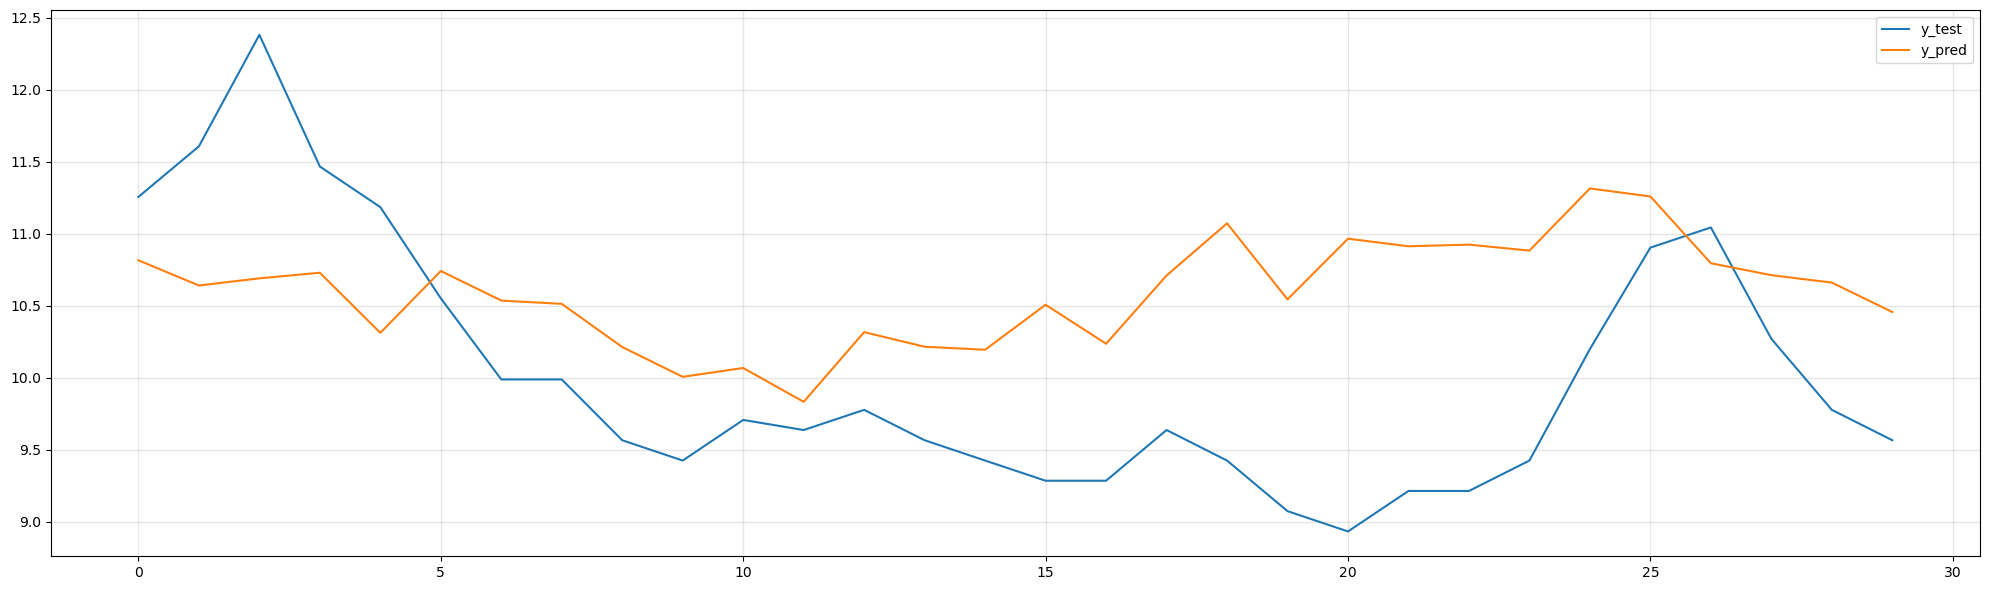

In [9]:
from spinesTS.nn._patch_rnn2 import SegRNN
from spinesTS.metrics import wmape

model = SegRNN(128, 30, random_seed=42, loss_fn='mae', learning_rate=0.001, device='auto')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size='auto', min_delta=0, patience=100, epochs=3000, verbose=True)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))

y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"wmape: {wmape(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# StackingRNN

MPS  available: True   | MPS  use: True
CUDA available: False  | CUDA use: False
TPU  available: False  | TPU  use: False
CPU  available: True   | CPU  use: False


Epoch 1/3000  
4/4 - p0 -  [*lr: 0.0009045] - loss: 0.2653 - mae: 0.2653 - val_loss: 0.1212 - val_mae: 0.1212 - 0.68s/epoch - 0.171s/step
Epoch 2/3000  
4/4 - p0 -  [*lr: 0.0006545] - loss: 0.1290 - mae: 0.1290 - val_loss: 0.1008 - val_mae: 0.1008 - 0.16s/epoch - 0.041s/step
Epoch 3/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.1093 - mae: 0.1093 - val_loss: 0.0598 - val_mae: 0.0598 - 0.22s/epoch - 0.054s/step
Epoch 4/3000  
4/4 - p0 -  [*lr: 9.55e-05] - loss: 0.0912 - mae: 0.0912 - val_loss: 0.0459 - val_mae: 0.0459 - 0.21s/epoch - 0.052s/step
Epoch 5/3000  
4/4 - p0 - [*lr: 0.000000e+00] - loss: 0.0847 - mae: 0.0847 - val_loss: 0.0428 - val_mae: 0.0428 - 0.15s/epoch - 0.039s/step
Epoch 6/3000  
4/4 - p0 -  [*lr: 9.55e-05] - loss: 0.0824 - mae: 0.0824 - val_loss: 0.0417 - val_mae: 0.0417 - 0.20s/epoch - 0.051s/step
Epoch 7/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.0822 - mae: 0.0822 - val_loss: 0.0394 - val_mae: 0.0394 - 0.16s/epoch - 0.039s/step
Epoch 8/3000  
4/4 - p1 -  [*lr: 0

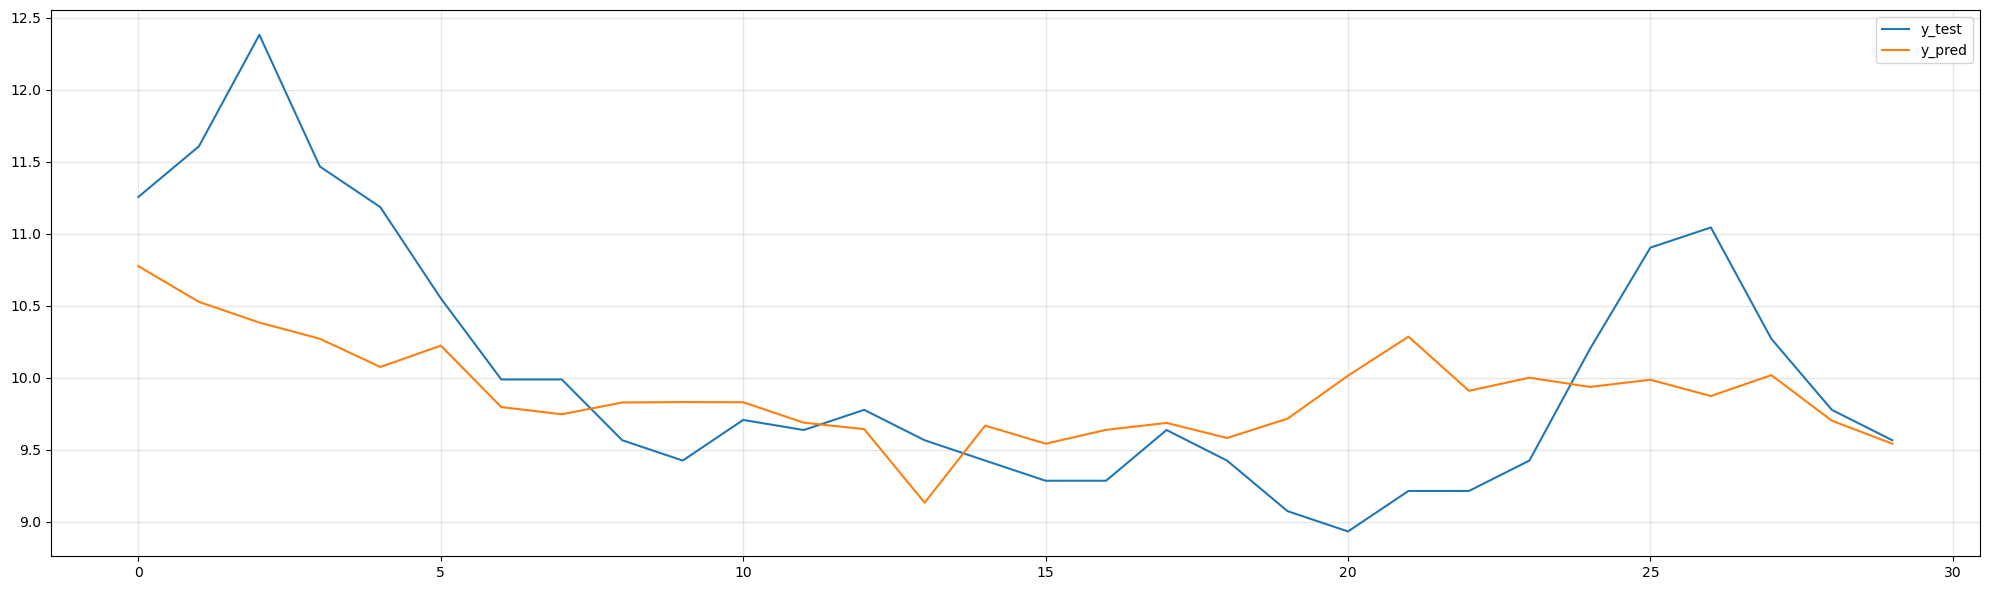

In [9]:
model = StackingRNN(128, 30, blocks=2, random_seed=42, loss_fn='mae', learning_rate=0.001,
                    device='auto')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size='auto',
             min_delta=0, patience=100, epochs=3000, verbose=True)

y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))

y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# GAUNet

MPS  available: True   | MPS  use: True
CUDA available: False  | CUDA use: False
TPU  available: False  | TPU  use: False
CPU  available: True   | CPU  use: False


Epoch 1/3000  
4/4 - p0 -  [*lr: 0.0009045] - loss: 0.6651 - mae: 0.6651 - val_loss: 0.3517 - val_mae: 0.3517 - 1.65s/epoch - 0.412s/step
Epoch 2/3000  
4/4 - p0 -  [*lr: 0.0006545] - loss: 0.3423 - mae: 0.3423 - val_loss: 0.2070 - val_mae: 0.2070 - 0.56s/epoch - 0.139s/step
Epoch 3/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.2209 - mae: 0.2209 - val_loss: 0.1467 - val_mae: 0.1467 - 0.45s/epoch - 0.113s/step
Epoch 4/3000  
4/4 - p0 -  [*lr: 9.55e-05] - loss: 0.1603 - mae: 0.1603 - val_loss: 0.1089 - val_mae: 0.1089 - 0.44s/epoch - 0.111s/step
Epoch 5/3000  
4/4 - p0 - [*lr: 0.000000e+00] - loss: 0.1374 - mae: 0.1374 - val_loss: 0.0986 - val_mae: 0.0986 - 0.54s/epoch - 0.134s/step
Epoch 6/3000  
4/4 - p1 -  [*lr: 9.55e-05] - loss: 0.1329 - mae: 0.1329 - val_loss: 0.0986 - val_mae: 0.0986 - 0.45s/epoch - 0.113s/step
Epoch 7/3000  
4/4 - p0 -  [*lr: 0.0003455] - loss: 0.1277 - mae: 0.1277 - val_loss: 0.0810 - val_mae: 0.0810 - 0.56s/epoch - 0.141s/step
Epoch 8/3000  
4/4 - p0 -  [*lr: 0

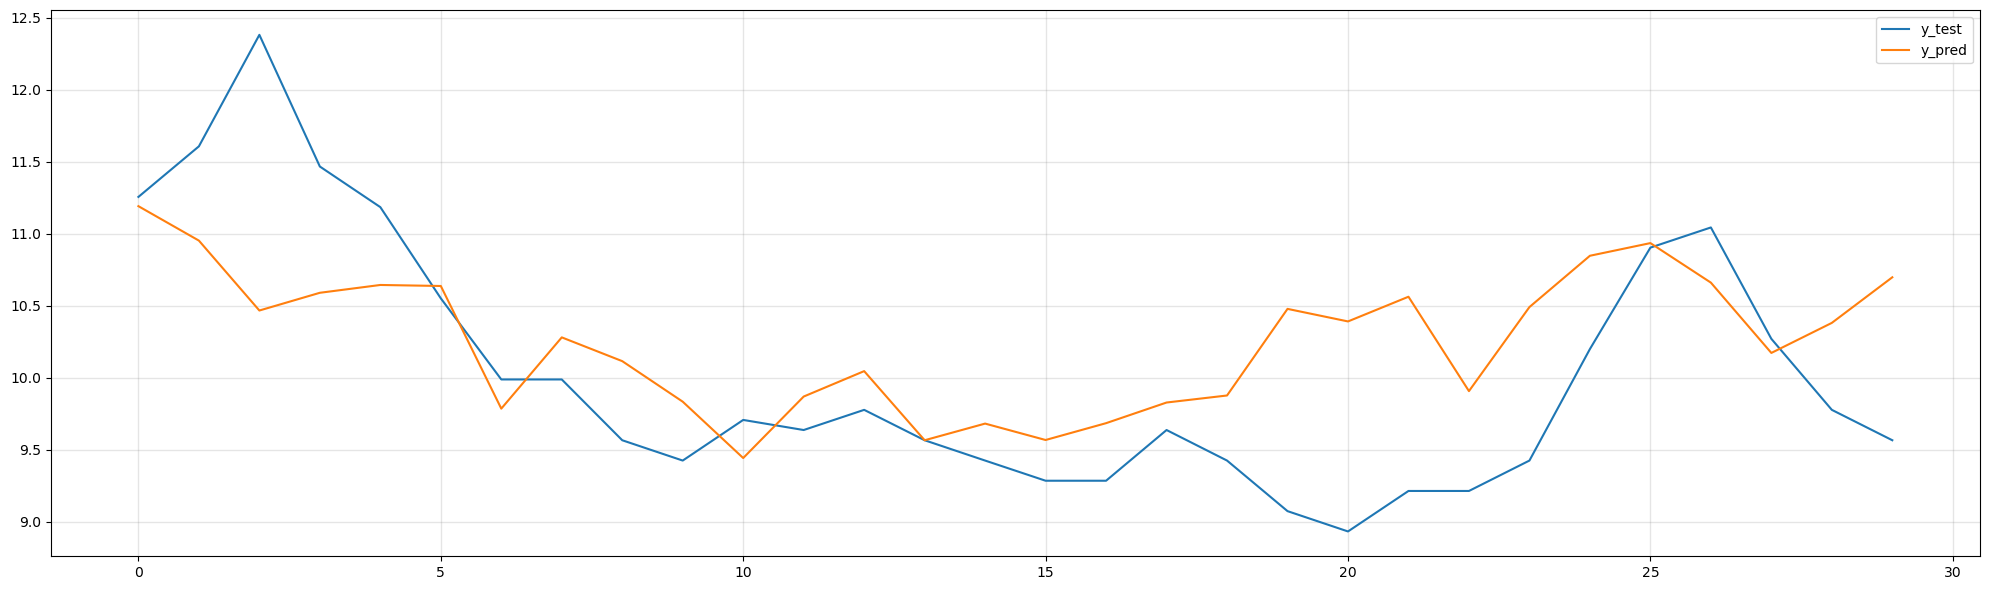

In [14]:
model = GAUNet(128, 30, random_seed=42, learning_rate=0.001, level=2, device='mps')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size='auto',
             min_delta=0, patience=100, epochs=3000, verbose=True)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))
y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# Time2VecNet

MPS  available: True   | MPS  use: False
CUDA available: False  | CUDA use: False
TPU  available: False  | TPU  use: False
CPU  available: True   | CPU  use: True


Epoch 1/3000  
486/486 - p0 -  [*lr: 0.0009045] - loss: 0.1871 - mae: 0.1871 - val_loss: 0.1543 - val_mae: 0.1543 - 2.25s/epoch - 0.005s/step
Epoch 2/3000  
486/486 - p0 -  [*lr: 0.0006545] - loss: 0.1105 - mae: 0.1105 - val_loss: 0.1247 - val_mae: 0.1247 - 2.22s/epoch - 0.005s/step
Epoch 3/3000  
486/486 - p0 -  [*lr: 0.0003455] - loss: 0.0892 - mae: 0.0892 - val_loss: 0.0846 - val_mae: 0.0846 - 2.20s/epoch - 0.005s/step
Epoch 4/3000  
486/486 - p0 -  [*lr: 9.55e-05] - loss: 0.0761 - mae: 0.0761 - val_loss: 0.0562 - val_mae: 0.0562 - 2.20s/epoch - 0.005s/step
Epoch 5/3000  
486/486 - p0 - [*lr: 0.000000e+00] - loss: 0.0687 - mae: 0.0687 - val_loss: 0.0299 - val_mae: 0.0299 - 2.21s/epoch - 0.005s/step
Epoch 6/3000  
486/486 - p1 -  [*lr: 9.55e-05] - loss: 0.1248 - mae: 0.1248 - val_loss: 0.0299 - val_mae: 0.0299 - 2.26s/epoch - 0.005s/step
Epoch 7/3000  
486/486 - p0 -  [*lr: 0.0003455] - loss: 0.0574 - mae: 0.0574 - val_loss: 0.0296 - val_mae: 0.0296 - 2.25s/epoch - 0.005s/step
Epoch 

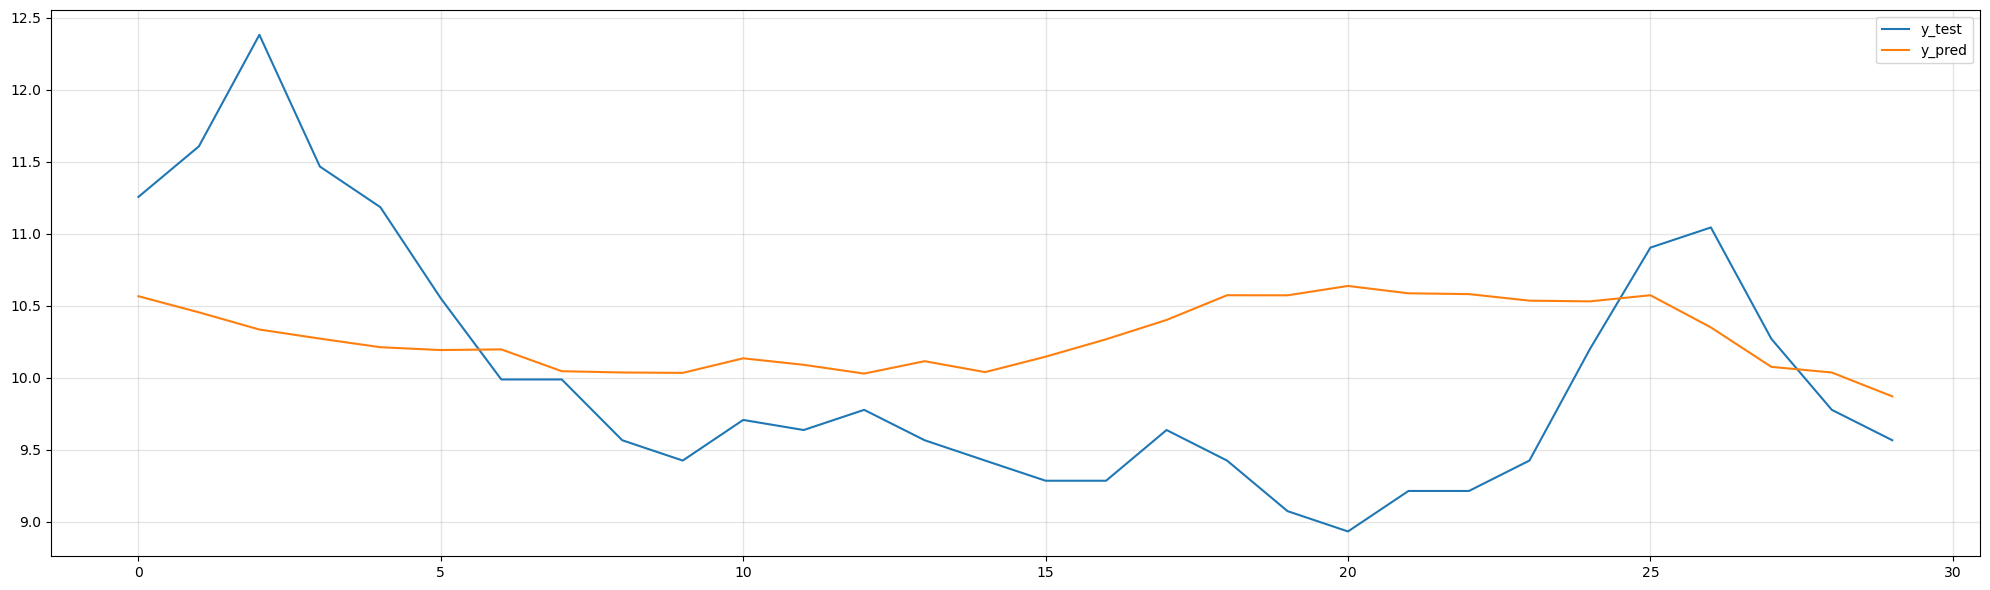

In [11]:
model = Time2VecNet(128, 30, random_seed=42, learning_rate=0.001, device='cpu', ma_window_size=0)
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True)

y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))
y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))